# Digital Image Processing - HW3 - 98722278 - Mohammad Doosti Lakhani
In this notebook, I have solved the assignment's problems which are as follows:

1. In the below images (left), vertical black and white strips with 2 pixel width exists. The image on the right indicates its frequency spectrum. Answer the following questions about the given information:
    1. Why frequency spectrum only exists in **horizontal** dimension?
    2. If the width of strips increase to **4 pixel**, how will the frequency spectrum change?
    3. If the width of strips increase to **1 pixel**, how will the frequency spectrum change?
    4. If we use **DCT** instead of **DFT**, what will be the differences in frequency spectrum?
    
![vertical strips image and its DFT transform](wiki/q01.jpg)

2. Do the following tasks on `image2` and `image3`:
    1. Use available functions to calculate 2D `DFT` and `DCT` and show the results.
    2. For both of the `DCT` and `DFT` transforms, sort the absolute value of their factors. Also, Sort the brighness values of the images.
    3. Calculate the squared cumulutive sum of those values and plot those.
    4. Analyze the obtained results.
    
    
3. Do the following tasks on `striping.bmp` image:
    1. Reduce the noises in the `striping.bmp` image in `DCT` domain as much as possible without considerable decrease in image quality.
    2. Explain the procedure and demonstrate the result.


4. In the reference book, the process of achieving `DCT` using `FFT` for 1D has been explained. As `DCT` is a separable function, we can use the aforementioned approach to obtain the `DCT` in higher orders. So the tasks for this questions:
    1. Show the mathematical calculations to obtain the 2D `DCT`.
    2. Write a program to calculate `DCT` of an image using your approach.
    3. Apply your `DCT` function from step 2 on `image1.tif` and compare your result the one obtained from question 2.

## 1 Frequency Spectrum of DCT and DFT
In the below images (left), vertical black and white strips with 2 pixel width exists. The image on the right indicates its frequency spectrum. Answer the following questions about the given information:
1. Why frequency spectrum only exists in **horizontal** dimension?
2. If the width of strips increase to **4 pixel**, how will the frequency spectrum change?
3. If the width of strips increase to **1 pixel**, how will the frequency spectrum change?
4. If we use **DCT** instead of **DFT**, what will be the differences in frequency spectrum?
    
![](wiki/q01.jpg)

I try to answer all the questions in this section using following images from [Dr. Mohammadi at Iran University of Science and Technology - Instructor](#):

DFT basic functions:
![dft table](wiki/dft-table.jpg)

DCT basic functions:
![dct table](wiki/dct-table.jpg)

### 1.A Horizontal values for vertical strips
So as we can see in the DFT's basis functions, vertical strips exists in horizontal dimension. Actually, we just need to compare first row and first column and it is obvious that **vertical strips means consistent change horizontally**, so first row is the functions that representing the frequency spectrum of the given image. Furthermore, the **DC** value, the pixel in the center of the frequency spectrum will be light always in this question because we have a lot of pixels with 255 value.
Note: The images of basic functions are not shifted but the image in the question is shifted.

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
%matplotlib inline

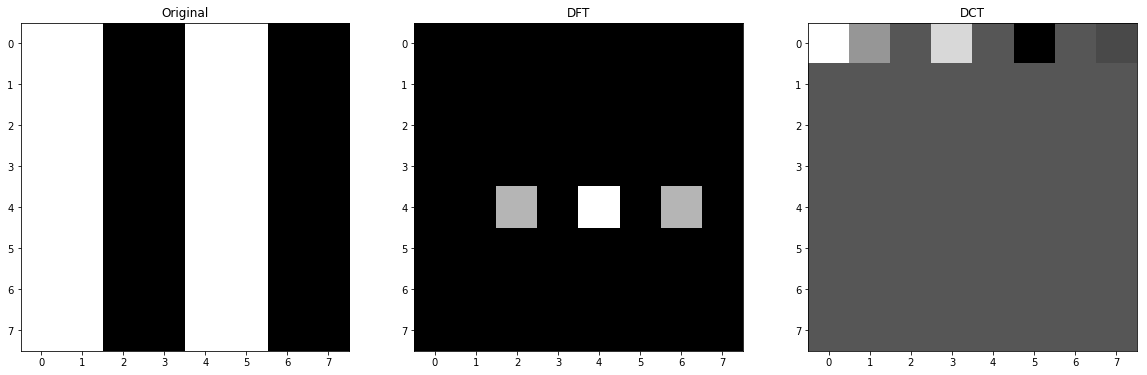

In [10]:
image = np.zeros((8, 8), dtype=np.int)
image[:,0::4] = 255
image[:,1::4] = 255

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

c = cv2.dct(np.float32(image))

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))

ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')

ax[1].set_title('DFT')
ax[1].imshow(np.abs(fshift), cmap = 'gray')

ax[2].set_title('DCT')
ax[2].imshow(c, cmap = 'gray')

### 1.B Double Widths of Strips
We know that when the image is natural, there a few pixels that have high frequency so almost all images concentrates on the center of the DFT transform and as we increase the radius from the center to the frame, the high frequency areas are covered so in this change, doubling the strip sizes, we are reducing the amount of changes so basic functions with less horizontal changes will have bigger factors and the output image of DFT (frequency spectrum) will have more dense light pixels. In other words, the functions that covers this kind of frequencies are near to the center than before.

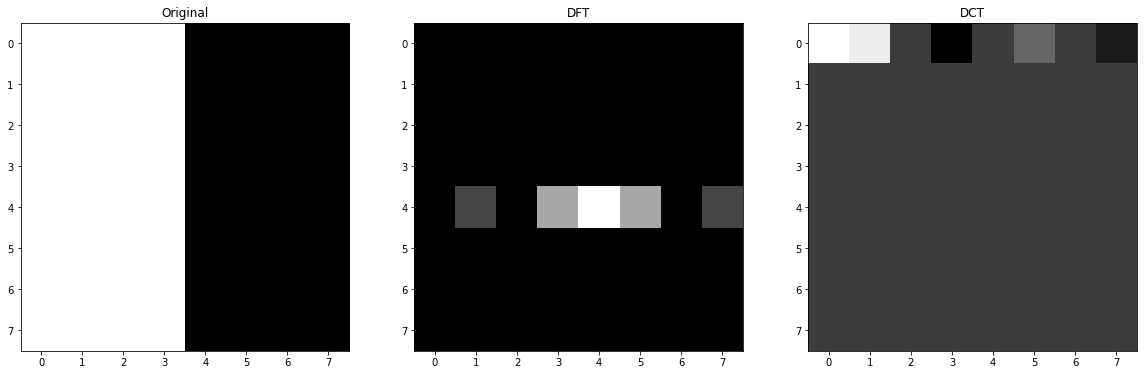

In [14]:
image = np.zeros((8, 8), dtype=np.int)
image[:,0::8] = 255
image[:,1::8] = 255
image[:,2::8] = 255
image[:,3::8] = 255

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

c = cv2.dct(np.float32(image))
# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))

ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')

ax[1].set_title('DFT')
ax[1].imshow(np.abs(fshift), cmap = 'gray')

ax[2].set_title('DCT')
ax[2].imshow(c, cmap = 'gray')

### 1.C Half Widths of Strips
In this situation, we maximized the possible noise or frequency so only the basic function that represents this kind of noise will have a big factor (except the **DC** value itself) and as I have explained in the previous section 1.B, more distance from center means more frequency so the last one will be trigered. In the provided image of the basic functions of DFT in the beginning of this question, the corresponding column will be first row and middle column as it is not shifted.

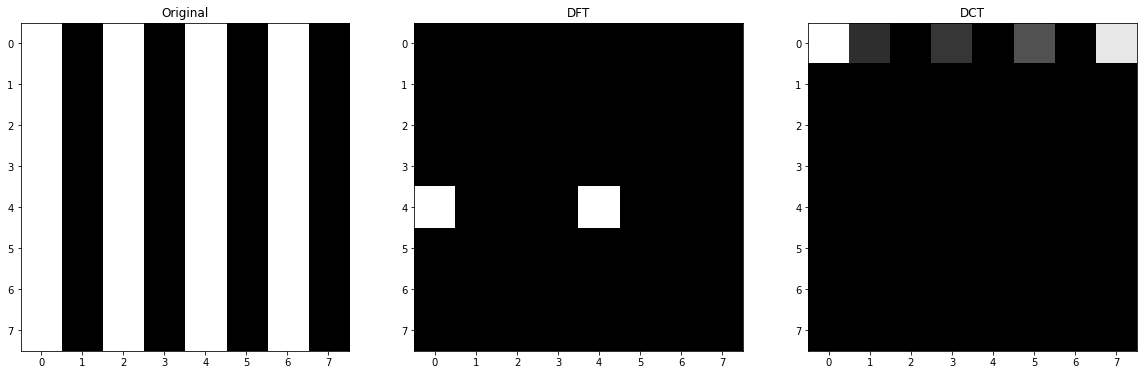

In [125]:
image = np.zeros((8, 8), dtype=np.int)
image[:,0::2] = 255

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

c = cv2.dct(np.float32(image))

# plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))

ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')

ax[1].set_title('DFT')
ax[1].imshow(np.abs(fshift), cmap = 'gray')

ax[2].set_title('DCT')
ax[2].imshow(c, cmap = 'gray')

### 1.D
As we can see in the image of basis function, only first row indicates the changes horizontally (or vertical strips), so their factors will be non-zero and we can see that when we try to move horizontally the basis functions indicate more frequencies. Also, the first value here is `DC` too, so it will be huge again. 
Something you might notice is that some of factors are zero and the reason is that the from of strips or the phase of the image and function are destructive so the value will be 0 and the other are huge again because the strip is on the same harmony with the basis functions.
And if I want to explain the sign of values, I can say that when the coefficient is going towards +inf, the similarity is higher and if it is going towards -inf, still they are similar but in opposite phase which is somehow difference and 0 means they have no similarity at all. For instance, in our examples, the values of all rows except first one are 0 because we do not have diagonal or horizontal change in the original image.

## 2 DCT and DFT on `image2` and `image3`:
1. Use available functions to calculate 2D `DFT` and `DCT` and show the results.
2. For both of the `DCT` and `DFT` transforms, sort the absolute value of their factors. Also, Sort the brighness values of the images.
3. Calculate the squared cumulutive sum of those values and plot those.
4. Analyze the obtained results.

### 2.A Use DFT and DCT

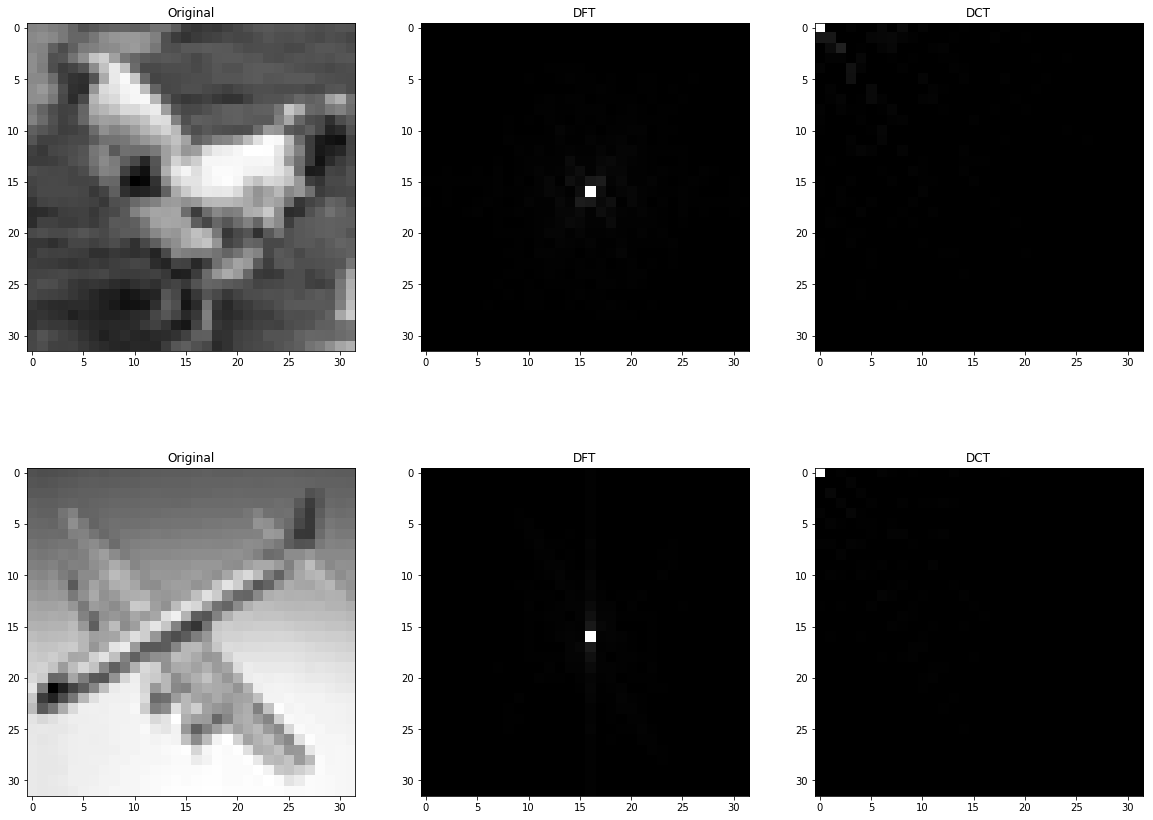

In [59]:
src_path = 'images/'
dst_path = 'transformed/'
names = os.listdir(src_path)

fshift_values = []
dct_values = []
image_values = []

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
for idx, name in enumerate(names[1:-1]):
    # load image
    src_name = src_path + name
    image = cv2.imread(src_name, cv2.IMREAD_GRAYSCALE)
    image_values.append(image)
    
    # DFT
    f = np.fft.fft2(image)
    fshift = np.abs(np.fft.fftshift(f))
    fshift_values.append(fshift)
    fshift = fshift*255/fshift.max()  # scale between 0 and 255
    dst_name = dst_path + name + '_dft.bmp'
    cv2.imwrite(dst_name, fshift)
    
    # DCT
    c = cv2.dct(np.float32(image))
    dct_values.append(c)
    c = c*255/c.max()  # scale between 0 and 255
    dst_name = dst_path + name + '_dct.bmp'
    cv2.imwrite(dst_name, c)
    
    # plot
    ax[idx,0].set_title('Original')
    ax[idx,0].imshow(image, cmap='gray')
    
    ax[idx,1].set_title('DFT')
    ax[idx,1].imshow(fshift, cmap = 'gray')
    
    # I just zero all negative value to make demonstration more comprehensive, but save images with negative values
    c[c<0] = 0
    ax[idx,2].set_title('DCT')
    ax[idx,2].imshow(c, cmap = 'gray')

### 2.B Sorted Absolute Value of Factors and Image Brightness


In [62]:
sorted_fshift_values = [np.sort(np.abs(fsh).flatten())[::-1] for fsh in fshift_values]
sorted_dct_values = [np.sort(np.abs(dct).flatten())[::-1] for dct in dct_values]
sorted_image_values = [np.sort(img.flatten())[::-1] for img in image_values]

### 2.C Squared Cumulutive Sum

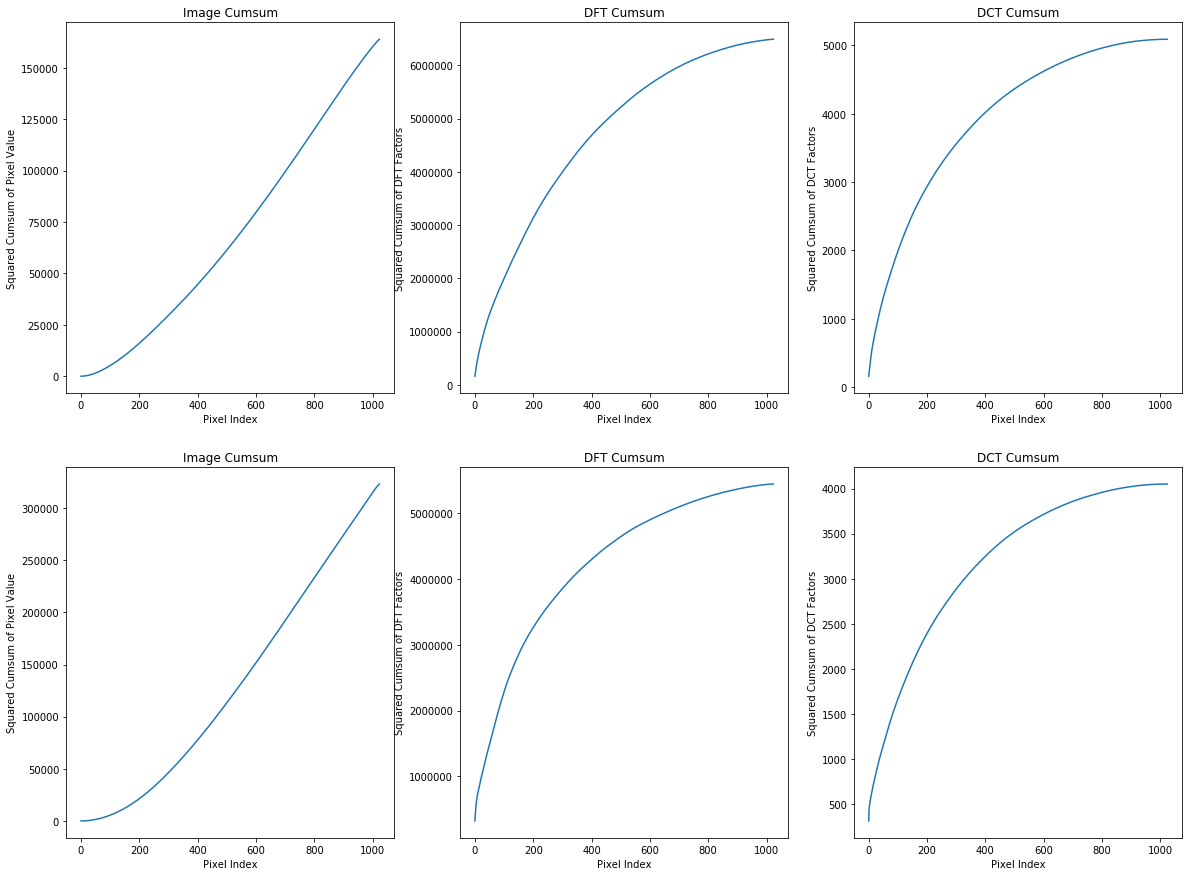

In [113]:
squared_cumsum_sorted_fshift = []
squared_cumsum_sorted_dct = []
squared_cumsum_sorted_image = []

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

for idx in range(len(sorted_image_values)):
    # note: I have done some scaling to prevent from overflowing
    squared_cumsum_sorted_image.append((sorted_image_values[idx].cumsum()/10e4)**2*10e4)
    squared_cumsum_sorted_fshift.append((sorted_fshift_values[idx].cumsum()/10e4)**2*10e4)
    squared_cumsum_sorted_dct.append((sorted_dct_values[idx].cumsum()/10e4)**2*10e4)
    
    # plot
    ax[idx,0].set_title('Image Cumsum')
    ax[idx,0].set_xlabel('Pixel Index')
    ax[idx,0].set_ylabel('Squared Cumsum of Pixel Value')
    ax[idx,0].plot(squared_cumsum_sorted_image[idx])
    
    ax[idx,1].set_title('DFT Cumsum')
    ax[idx,1].set_xlabel('Pixel Index')
    ax[idx,1].set_ylabel('Squared Cumsum of DFT Factors')
    ax[idx,1].plot(squared_cumsum_sorted_fshift[idx])
    
    ax[idx,2].set_title('DCT Cumsum')
    ax[idx,2].set_xlabel('Pixel Index')
    ax[idx,2].set_ylabel('Squared Cumsum of DCT Factors')
    ax[idx,2].plot(squared_cumsum_sorted_dct[idx])

1. Based on the first column of plots we can say that second image is brighter than the first one and the reason is that in  the first image cumsum till pixel 400 is about 25000 while for the second one is about twice as the first one at same pixel index. We can see such a huge differences in DFT and DCT too.
2. One important point that I should not forget to mention is that the these images are natural which means there are little noises and the DFT and DCT transforms also confirm these idea and as we sorted the coefficients too so all small values corresponding to the noises which are small by the way, are at the end of the array of cumsum, so any difference at the end of cumsum graph demonstrates more noise in the original image so based on the given explanation, second image has less noise that the first one because both cumsum of DCT and DFT values of the second image at the end of graph are much lower than the first one. In other words, small coefficients (noises) have bigger values in the first image.
3. We know that both DFT and DCT are lossless transforms, so both of them are representing same thing. Meanwhile we can see an immense difference between maximum value in any point of graph which indicates DCT can retain much more energy of the signal in much less number of coefficients. So that is why DCT is the prefered transforms for compression algorithms like JPEG. So simply we can compress a signal by only preserving coefficients that contain significant values.

## 3 `striping.bmp` Compression:
1. Reduce the noises in the `striping.bmp` image in `DCT` domain as much as possible without considerable decrease in image quality.
2. Explain the procedure and demonstrate the result.

Note: The original image was 5MB so I just added a JPEG screenshot of it in this document to reduce size of it. Original image exist in `images` folder.

![uncompressed image](wiki/compression.jpg)

### 3.A
First we obtain DCT of the image, then we use masks to zero most of coefficient that are exists in the right corner of the DCT transform.

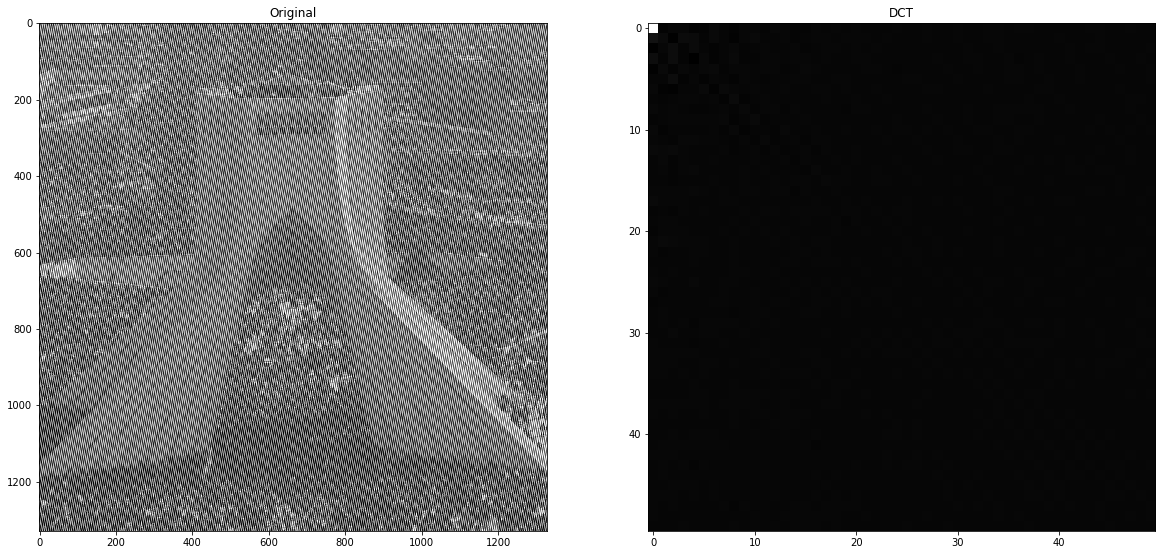

In [403]:
image = cv2.imread('images/striping.bmp', cv2.IMREAD_GRAYSCALE)

dct = cv2.dct(np.float32(image))

# plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 15))

ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')

ax[1].set_title('DCT')
# because the size of image is huge, I have just ploted the top 50x50 pixel of coefficients
ax[1].imshow(dct[:50,0:50], cmap = 'gray')  

True

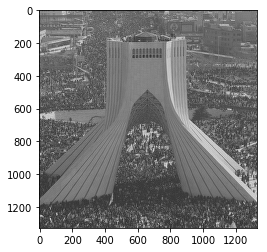

In [404]:
rows = 250
columns = 250
dct[rows:, :] = 0  # 50 150
dct[:, columns:] = 0  # 50 150
idct = cv2.idct(dct)
plt.imshow(idct, cmap='gray')
cv2.imwrite('compressed_denoised.bmp', np.uint8(idct))

First step of compression is transformation and we do this using DCT transform. This image contains a lot of vertical strips which means the ending column of the DCT transform have high coefficients. Furthermore, we can see many diagonal noises too so as we can see in the below image, when we move to the right corner of DCT, coefficient are still high. The below image is 20x20 image of the bottom-corner of the DCT transform and in a natural image, these values almost must be zero or near but we can see this is not happening here.

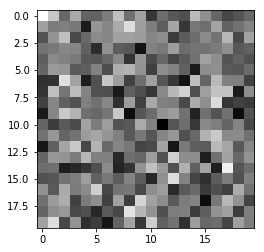

In [405]:
plt.imshow(dct_temp[-20:,-20:], cmap = 'gray')

On the other hand, we know that most of signal's energy is concentrated on the first coefficient (top-left-corner). Here is the image of DCT transform in 20x20 pixel:

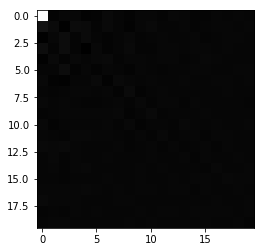

In [406]:
plt.imshow(dct_temp[:20,:20], cmap = 'gray')

So the idea is here to zero all those coefficients which correspond to the noises and we do this by this line of code:
```python
dct[250:, 250:] = 0 
```
Now we have reduced information which most of them were noises and we just need to say how many zeros we have in term of length.
Example:
```
[1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] -> [1, 2, 3,, 1, 3, 13, 1] 
```
4 last values represent shape of compressed image and final image respectively. so we can obtain number of zeros just by it.

In [407]:
def compress(dct, rows, columns, save=True):
    """
    Compresses image using given DCT coefficient values and number of non-zero rows and columns
    
    :param dct: 
    :param rows:
    :param columns:
    :param save:
    :return:
    """
    shape = dct.shape
    shapes = np.array([rows, columns, dct.shape[0], dct.shape[1]])
    compressed = np.empty(rows*columns+4)
    compressed[:rows*columns] = dct[:rows, :columns].flatten()
    for idx, s in zip([-4,-3,-2,-1], shapes):
        compressed[idx] = s
    if save:
        np.save('compressed_denoised_data.npy', compressed, False, False)
    return compressed
compressed_image = compress(dct, rows, columns)
print('Compression ratio: {}'.format(compressed.shape[0]*100/(dct.shape[0]*dct.shape[1])))

Compression ratio: 0.42517700599236674


In this section now we do reverse what we have done in `compress` method to get uncompressed numpy array.

In [429]:
def uncompress(path):
    """
    Gets a path to .npy file containing compressed image and decompress it to a standard DCT array.
    
    :param path: path to a .npy file in specified format
    :return: a numpy ndarray
    """
    compressed_image = np.load(path)
    shape = (np.int(compressed_image[-2]), np.int(compressed_image[-1]))
    rows = np.int(compressed_image[-4])
    columns = np.int(compressed_image[-3])
    uncompressed_image = np.zeros(shape)
    uncompressed_image[:rows, :columns] = compressed_image[:-4].reshape(rows, columns)
    uncompressed_image = uncompressed_image.astype(np.float32)
    return uncompressed_image

uncompressed_image= uncompress('compressed_denoised_data.npy')

The last step will be inverse-DCT to get image and `cv2.idct()` is able to do this.

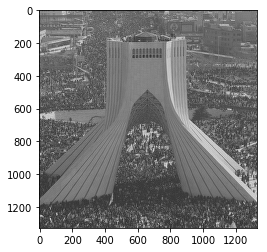

In [430]:
idct = cv2.idct(uncompressed_image)
plt.imshow(idct, cmap='gray')

## 4 Create 2D DCT From 1D Based on Separable Kernels
1. Show the mathematical calculations to obtain the 2D `DCT`.
2. Write a program to calculate `DCT` of an image using your approach.
3. Apply your `DCT` function from step 2 on `image1.tif` and compare your result the one obtained from question 2.

### 4.A Mathematical Calculations

![2d DCT mathematics using FFT](wiki/dct_fft.jpg)

I MISUNDERSTOOD THE QUESTION AND IMPLEMENTED 2D DCT USING 1D DCT TOO.

![2d DCT mathematics using 1D DCT](wiki/4.1.jpg)

### 4.B Implementation

In [113]:
def dct_from_fft(signal):
    """
    Calculates 2D DCT from 1D FFT (Page 489 and 490 of Gonzales 4th ed.)
    
    :param signal: input spatial signal in form of numpy ndarray
    :return: 2D DCT of input in form of numpy ndarray
    """
    r,c = signal.shape
    g = np.zeros((r*2, c*2))
    g[:r, :c] = signal
    g[:r,c:] = np.flip(signal, axis=1)
    g[r:,:] = np.flip(g[:r,:], axis=0)
    ft = np.fft.fft2(g)[:r,:c]
    h = np.zeros(signal.shape, dtype=complex)
    for i in range(signal.shape[0]):
        for j in range(signal.shape[1]):
            h[i,j] = np.exp(-1j*np.pi*j/(2*signal.shape[1])) * np.exp(-1j*np.pi*i/(2*signal.shape[0]))
    s = np.ones(signal.shape)
    s[0,0] = 1./np.sqrt(2)
    dct = np.real(s*h*ft)/(np.sqrt(2*r*r*c*c))
    return dct 

In [54]:
## I MISUNDERSTOOD THE QUESTION AND IMPLEMENTED 2D DCT USING 1D DCT TOO.

def dct(signal, dim=2):
    """
    
    :param signal: Input spatial domain signal (numpy ndarray)
    :param dim: Whether use 2D DCT or 1D DCT
    :return: DCT coefficients of signal (numpy ndarray)
    """
    # horizontal
    g = np.zeros(signal.shape)
    c = 0
    for v in range(signal.shape[0]):
        for j in range(signal.shape[0]):
            c += signal[j]*np.cos((2*j+1)*np.pi*v/(2*signal.shape[0]))
        if v == 0:
            g[v] = c*np.sqrt(2)/2
        else:
            g[v] = c
        c=0
    g = g*np.sqrt(2/signal.shape[0])
    if dim == 1:
        return g
    
    # vertical
    f = np.zeros(signal.shape)
    c = 0
    for v in range(g.shape[1]):
        for j in range(g.shape[1]):
            c += g[:,j]*np.cos((2*j+1)*np.pi*v/(2*g.shape[1]))
        if v == 0:
            f[:,v] = c*np.sqrt(2)/2
        else:
            f[:,v] = c
        c=0
    f = f*np.sqrt(2/g.shape[1])
    return f

### 4.C Compare Your DCT with `cv2.dct`

dct_from_fft: 0.03697705268859863 cv2.dct 0.0009982585906982422


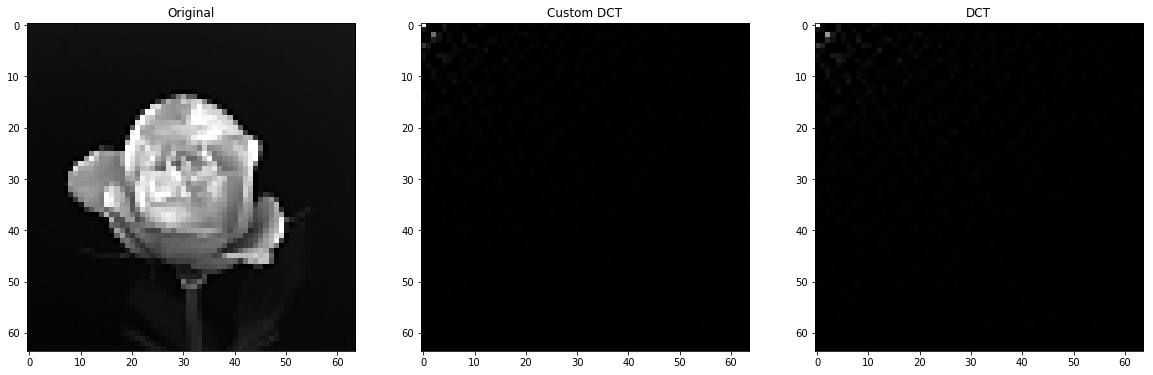

In [120]:
import time
src_name = 'images/image1.tif'
dst_path = 'transformed/'

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))
# load image
image = cv2.imread(src_name, cv2.IMREAD_GRAYSCALE)

# Custom DCT
t1 = time.time()
custom_dct = dct_from_fft(image)
t1 = time.time()- t1
custom_dct = custom_dct*255/custom_dct.max()  # scale between 0 and 255
dst_name = dst_path + 'image1_custom_dct.bmp'
cv2.imwrite(dst_name, custom_dct)

# DCT
t2 = time.time()
c = cv2.dct(np.float32(image))
t2 = time.time()- t2
c = c*255/c.max()  # scale between 0 and 255
dst_name = dst_path + 'image1_CV_dct.bmp'
cv2.imwrite(dst_name, c)

# plot
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')

# I just zero all negative value to make demonstration more comprehensive, but save images with negative values
custom_dct[custom_dct<0] = 0
ax[1].set_title('Custom DCT')
ax[1].imshow(custom_dct, cmap = 'gray')

# I just zero all negative value to make demonstration more comprehensive, but save images with negative values
c[c<0] = 0
ax[2].set_title('DCT')
ax[2].imshow(c, cmap = 'gray')
print('dct_from_fft:', t1, 'cv2.dct', t2)

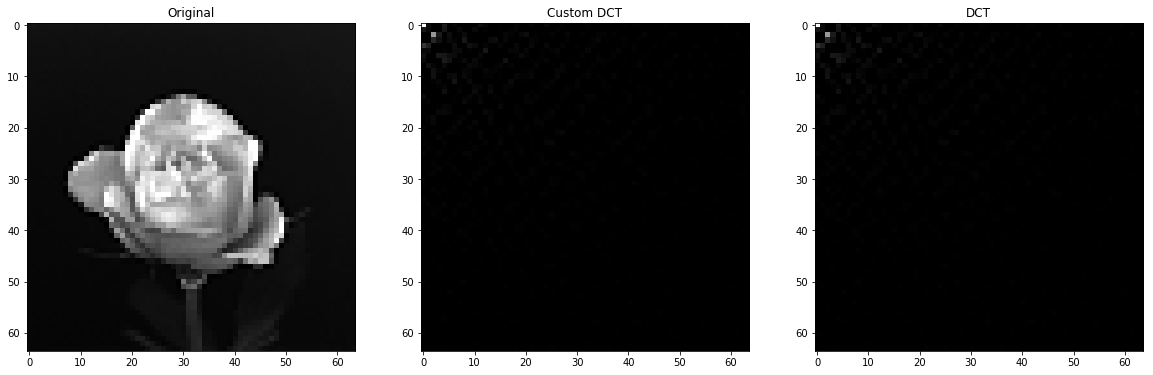

In [64]:
## I MISUNDERSTOOD THE QUESTION AND IMPLEMENTED 2D DCT USING 1D DCT TOO.

src_name = 'images/image1.tif'
dst_path = 'transformed/'

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 15))
# load image
image = cv2.imread(src_name, cv2.IMREAD_GRAYSCALE)

# Custom DCT
custom_dct = dct(image)
custom_dct = custom_dct*255/custom_dct.max()  # scale between 0 and 255
dst_name = dst_path + 'image1_custom_dct.bmp'
cv2.imwrite(dst_name, custom_dct)

# DCT
c = cv2.dct(np.float32(image))
c = c*255/c.max()  # scale between 0 and 255
dst_name = dst_path + 'image1_CV_dct.bmp'
cv2.imwrite(dst_name, c)

# plot
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')

# I just zero all negative value to make demonstration more comprehensive, but save images with negative values
custom_dct[custom_dct<0] = 0
ax[1].set_title('Custom DCT')
ax[1].imshow(custom_dct, cmap = 'gray')

# I just zero all negative value to make demonstration more comprehensive, but save images with negative values
c[c<0] = 0
ax[2].set_title('DCT')
ax[2].imshow(c, cmap = 'gray')

Both almost do same thing but based on the images of the DCTs, DCT from FFT seems has more error. In other words, it is less sensitive to the noises and focuses on coefficients regarding main features of the signal(top-left corner).
And about immense difference of time we can say that first of all cv2's core is in C language so it is faster and the DCT implementation in CV uses some kind of optimization which I am not aware of them.
I really want to compare more features but it would be better if we knew the metrics to compare.